In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import os

df = pd.read_csv('sample_data/finalddos.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [48]:
import sys
import sklearn

In [49]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (85540, 79)


In [51]:
#df.info()
#df.describe()

In [7]:
x = df.drop(' Label',axis=1)
y = df[' Label']

In [8]:
dropdf= df.dropna()
dropdf.shape

(43997, 79)

In [9]:
dropdf.isna().any()[lambda x:x]

Series([], dtype: bool)

In [10]:
del dropdf['Flow Bytes/s']
del dropdf[' Flow Packets/s']

In [11]:
df.iloc[0]

 Destination Port               54865
 Flow Duration                      3
 Total Fwd Packets                2.0
 Total Backward Packets           0.0
Total Length of Fwd Packets      12.0
                                ...  
Idle Mean                         0.0
 Idle Std                         0.0
 Idle Max                         0.0
 Idle Min                         0.0
 Label                         BENIGN
Name: 0, Length: 79, dtype: object

In [12]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)

(35197, 77)
(8800, 77)


In [13]:
print('Label distribution Training set:')
print(df_train[' Label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test[' Label'].value_counts())

Label distribution Training set:
BENIGN    20626
DDoS      14571
Name:  Label, dtype: int64

Label distribution Test set:
BENIGN    5168
DDoS      3632
Name:  Label, dtype: int64


In [14]:
# Setting the new value

labeldf=df_train[' Label']
print(labeldf)


25892      DDoS
828      BENIGN
37209      DDoS
15627    BENIGN
39099      DDoS
          ...  
41323    BENIGN
29769      DDoS
18500    BENIGN
25435      DDoS
6422     BENIGN
Name:  Label, Length: 35197, dtype: object


In [15]:
labeldf_test=df_test[' Label']
print(labeldf_test)
#change the label column

39814      DDoS
25815      DDoS
22410    BENIGN
27816      DDoS
5417     BENIGN
          ...  
9618     BENIGN
41100    BENIGN
3845     BENIGN
2980     BENIGN
28110      DDoS
Name:  Label, Length: 8800, dtype: object


In [16]:
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
newlabeldf=labeldf.replace({ 'BENIGN' : 0, 'DDoS' : 1 })

print(newlabeldf)
 
df_train[' Label'] = newlabeldf
df_test[' Label'] = newlabeldf_test
print(df_train[' Label'])


25892    1
828      0
37209    1
15627    0
39099    1
        ..
41323    0
29769    1
18500    0
25435    1
6422     0
Name:  Label, Length: 35197, dtype: int64
25892    1
828      0
37209    1
15627    0
39099    1
        ..
41323    0
29769    1
18500    0
25435    1
6422     0
Name:  Label, Length: 35197, dtype: int64


In [17]:
X_df_train=df_train.drop(' Label',1)
Y_df_train=df_train[' Label']
X_df_test=df_test.drop(' Label',1)
Y_df_test=df_test[' Label']
X_df_train
Y_df_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


25892    1
828      0
37209    1
15627    0
39099    1
        ..
41323    0
29769    1
18500    0
25435    1
6422     0
Name:  Label, Length: 35197, dtype: int64

In [18]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Fl

In [19]:
#print(X_df_train)
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_df_train)
X_df_train=scaler1.transform(X_df_train) 
# test data
scaler2 = preprocessing.StandardScaler().fit(X_df_test)
X_df_test=scaler2.transform(X_df_test) 



In [20]:
print(X_df_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [21]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')
selector=SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train,Y_df_train)
X_newdf_train.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [29 30 31 47 54 55 56 57 58 59] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(35197, 8)

In [22]:
true=selector.get_support()
newcolindex_DDoS=[i for i, x in enumerate(true) if x]
newcolname_DDoS=list( colNames[i] for i in newcolindex_DDoS )
newcolname_DDoS

['Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [23]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: ['Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Average Packet Size', ' Avg Bwd Segment Size']


In [24]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_df_train)'''

'from sklearn import preprocessing\nfrom sklearn import utils\n\nlab_enc = preprocessing.LabelEncoder()\nencoded = lab_enc.fit_transform(Y_df_train)'

In [25]:
Y_df_train=Y_df_train.astype('int')

In [26]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(1, ' Bwd Packet Length Std'), (2, ' Average Packet Size'), (3, ' Bwd Packet Length Mean'), (4, 'Bwd Packet Length Max'), (5, ' Packet Length Std'), (6, ' Avg Bwd Segment Size'), (7, ' Max Packet Length'), (8, ' Packet Length Mean')]


In [27]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train, Y_df_train)
X_rfeDDoS=rfe.transform(X_df_train)
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
rfecolname_DDoS=list(colNames[i] for i in rfecolindex_DDoS)

In [59]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: [' Destination Port', ' Total Backward Packets', ' Fwd Packet Length Mean', ' Bwd Packet Length Min', ' Bwd Packet Length Std', ' Flow IAT Std', ' act_data_pkt_fwd', ' Idle Min']


In [29]:
print(X_rfeDDoS.shape)
#print(X_df_train)

(35197, 8)
[[-0.38106109 -0.21468258 -0.0279694  ... -0.23597501 -0.07087292
   0.09662402]
 [-0.3591552   3.7258514   1.00713798 ... -0.23273577  0.09151234
   0.30177642]
 [-0.38106109 -0.42876344 -0.13148014 ... -0.23597501 -0.41513225
  -0.35285329]
 ...
 [-0.38269045 -0.45893249 -0.1832355  ... -0.23597501 -0.41513225
  -0.35285329]
 [-0.38106109 -0.28547997 -0.07972477 ... -0.23597501 -0.41513225
  -0.35285329]
 [-0.38269045 -0.4589338  -0.1832355  ... -0.23597501 -0.41513225
  -0.35285329]]


In [30]:
# all features
clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [31]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [32]:
Y_df_train_pred=clf_DDoS.predict(X_df_test)
# Create confusion matrix
pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,5168,0
1,1117,2515


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 0.99898 (+/- 0.00237)
Precision: 0.99890 (+/- 0.00501)
Recall: 0.99862 (+/- 0.00370)
F-measure: 0.99876 (+/- 0.00287)


In [34]:
import pickle
with open('DDOS_classifier.pickle','wb') as f:
  pickle.dump(clf_DDoS,f)

In [35]:
#lets plot our decision tree
#from sklearn.tree import plot_tree
#plt.figure(figsize=(20,10))
#plot_tree(clf_DDoS,filled=True,feature_names=df_train.columns)
#plt.savefig('DDOS-Decision-Tree')
#plt.show()



#from sklearn import tree
#text_representation = tree.export_text(clf_DDoS)
#print(text_representation)



In [36]:
#pip install seaborn

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
newcolname_DDoS

['Bwd Packet Length Max',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Average Packet Size',
 ' Avg Bwd Segment Size']

In [39]:
x=newcolname_DDoS[1]
y=newcolname_DDoS[3]

In [40]:
df_2 =df_test.iloc[:1000]
df_2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
39814,80,871554,3.0,6.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,20.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,1
25815,80,1194516,3.0,6.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,20.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,1
22410,14361,9311622,1.0,5.0,6.0,30.0,6.0,6.0,6.000000,0.000000,...,20.0,33922.0,0.000,33922.0,33922.0,9277700.00,0.000,9277700.0,9277700.0,0
27816,80,816103,3.0,5.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,...,20.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,1
5417,0,112360825,100.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,3792518.0,3469117.345,11000000.0,3.0,9163512.25,3940645.364,17200000.0,5082235.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,443,189539,48.0,64.0,1337.0,105841.0,570.0,0.0,27.854167,109.108377,...,20.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,0
14906,53,23864,1.0,1.0,41.0,105.0,41.0,41.0,41.000000,0.000000,...,32.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,0
9787,53,255,2.0,2.0,60.0,168.0,30.0,30.0,30.000000,0.000000,...,32.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,0
13534,443,4264629,5.0,1.0,135.0,46.0,46.0,6.0,27.000000,20.124612,...,20.0,0.0,0.000,0.0,0.0,0.00,0.000,0.0,0.0,0


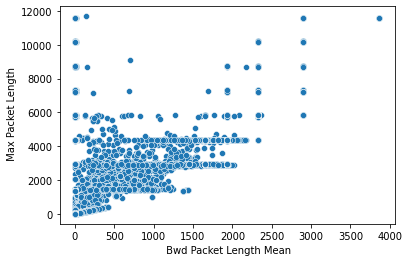

<Figure size 432x288 with 0 Axes>

In [41]:
sns.scatterplot(data = df, x = x, y = y)
plt.show()
plt.savefig('Visualize-DestinationvsBwdPacketLength.jpg')